<a href="https://colab.research.google.com/github/razzzeeev/razzzeeev/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

**Author : Rajeev Kumar Mehta**

# **Step 1: Import the Data**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [45]:
# Reading the Data 
data = pd.read_csv ('http://bit.ly/w-data')
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# Check if there any null value in the Dataset
data.isnull == True

False

In [36]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Step 2 : Data Visualization**

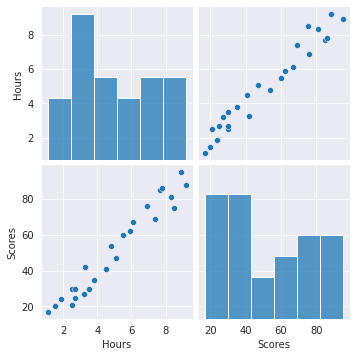

In [37]:
sns.set_style('darkgrid')
sns.pairplot(data)

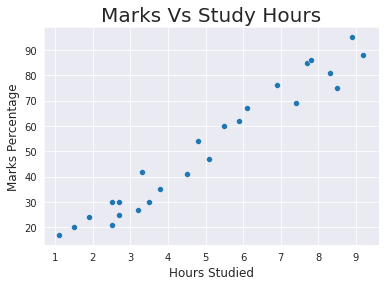

In [38]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

In [39]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


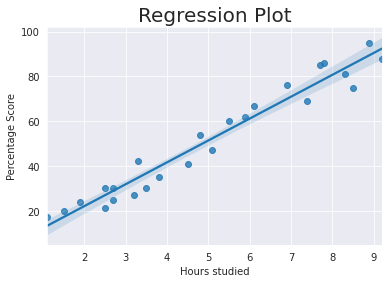

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [40]:
sns.set_style('darkgrid')
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.title('Regression Plot',size=20)
plt.show()
print(data.corr())

From the above plot it is confirmed that the variables are positively correlated.


# **Step 3 : Data Preparation**

In [41]:
# Extracting the values 
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [16]:
# No.of.Hours studied
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [42]:
# Scores obtained
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [18]:
# We will split the into train and test datasets using scikit learn
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
X_train

array([[5.1],
       [1.1],
       [6.1],
       [2.5],
       [4.5],
       [1.5],
       [6.9],
       [2.7],
       [3.5],
       [8.3],
       [3.3],
       [2.7],
       [8.9],
       [7.8],
       [9.2],
       [1.9],
       [5.9]])

In [21]:
y_train

array([47, 17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95, 86, 88, 24, 62])

In [22]:
X_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5]])

In [23]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75])

# **Step 4 : Training the Model**


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# Creating an instance of a LinearRegression() model named lr.
lr=LinearRegression()

In [27]:
# Train/fit lm on the training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Print out the coefficients of the model
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [9.96651548]


# **Step 5 : Predicting the Percentage of Marks**

In [30]:
predictions = lr.predict( X_test)
print(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]]


In [31]:
#compairing Actual vs predicted
df=pd.DataFrame({'Actual':y_test, 'Predicted': predictions})
df.head(8)

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


In [32]:
#Testing with Custom data of 9.25 hrs per day
hours=9.25
pred=lr.predict([[hours]])
print(f"No of Hours={hours}")
print(f"Predicted Score={pred[0]}")

No of Hours=9.25
Predicted Score=94.29276125536512


# **Step 6 : Model Evaluation** 

In [33]:
#Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error,Max Error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.


In [34]:
#Max error
print('Max Error',metrics.max_error(y_test,predictions))

Max Error 11.817874646129496



# **So,According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 94.29 marks.** 
                   

# **Thank you**